# Preprocessing

The purpose of this notebook is to preprocess all data from the MSD, and explore techniques to reduce the dimensionality of the label space.
We intend to transform the training ground-truth label into a smaller set of labels to prevent model underfitting.

In [1]:
%load_ext autoreload
%autoreload 2
import os
import util.hd5_reader as hd5r
from util.data_processor import DataProcessor
import pandas as pd
from tqdm import tqdm
import sys
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

In [2]:
parent_directory = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
data_dir = os.path.join(parent_directory, 'data')

In [3]:
p = '/Users/danieloman1/Desktop/multimodal-music-recommender/data/MillionSongSubset/A/A/A/TRAAAAW128F429D538.h5'
hd5r.list_groups(p)

Available Groups:
- analysis
- metadata
- musicbrainz


In [4]:
hd5r.list_datasets(p)

Available Datasets:
- analysis/bars_confidence
- analysis/bars_start
- analysis/beats_confidence
- analysis/beats_start
- analysis/sections_confidence
- analysis/sections_start
- analysis/segments_confidence
- analysis/segments_loudness_max
- analysis/segments_loudness_max_time
- analysis/segments_loudness_start
- analysis/segments_pitches
- analysis/segments_start
- analysis/segments_timbre
- analysis/songs
- analysis/tatums_confidence
- analysis/tatums_start
- metadata/artist_terms
- metadata/artist_terms_freq
- metadata/artist_terms_weight
- metadata/similar_artists
- metadata/songs
- musicbrainz/artist_mbtags
- musicbrainz/artist_mbtags_count
- musicbrainz/songs


['analysis/bars_confidence',
 'analysis/bars_start',
 'analysis/beats_confidence',
 'analysis/beats_start',
 'analysis/sections_confidence',
 'analysis/sections_start',
 'analysis/segments_confidence',
 'analysis/segments_loudness_max',
 'analysis/segments_loudness_max_time',
 'analysis/segments_loudness_start',
 'analysis/segments_pitches',
 'analysis/segments_start',
 'analysis/segments_timbre',
 'analysis/songs',
 'analysis/tatums_confidence',
 'analysis/tatums_start',
 'metadata/artist_terms',
 'metadata/artist_terms_freq',
 'metadata/artist_terms_weight',
 'metadata/similar_artists',
 'metadata/songs',
 'musicbrainz/artist_mbtags',
 'musicbrainz/artist_mbtags_count',
 'musicbrainz/songs']

In [5]:
hd5r.fields_in_dataset(p, 'metadata/songs')

Available fields in 'metadata/songs':
 - analyzer_version
 - artist_7digitalid
 - artist_familiarity
 - artist_hotttnesss
 - artist_id
 - artist_latitude
 - artist_location
 - artist_longitude
 - artist_mbid
 - artist_name
 - artist_playmeid
 - genre
 - idx_artist_terms
 - idx_similar_artists
 - release
 - release_7digitalid
 - song_hotttnesss
 - song_id
 - title
 - track_7digitalid


In [6]:
hd5r.fields_in_dataset(p, 'analysis/bars_start')


No fields found in 'analysis/bars_start'.


In [7]:
processor = DataProcessor(
    data_dir=data_dir,
    mbtag_db_path=os.path.join(data_dir, 'artist_term.db'),
    desired_fields={
        'metadata/songs': [
            'title',
            'artist_name',
            'artist_id',
            'song_id',
        ],
        'analysis/songs': [
            'danceability',
            'duration',
            'energy',
            'end_of_fade_in',
            'key',
            'loudness',
            'mode',
            'start_of_fade_out',
            'tempo',
            'time_signature',
        ],
        'analysis/bars_start': [],
        'analysis/beats_start': [],
        'analysis/segments_start': [],
        'analysis/sections_start': [],
        'analysis/segments_loudness_max': [],
        'analysis/segments_pitches': [],
        'analysis/segments_timbre': [],
        'analysis/tatums_start': [],
    },
    debug_messages=True
)

In [8]:
data = processor.process_dataset_df()

Found 10000 files with extension '.h5' in '/Users/danieloman1/Desktop/multimodal-music-recommender/data'.


Processing files: 100%|██████████| 10000/10000 [01:25<00:00, 116.68it/s]


In [9]:
data.shape

(10000, 23)

In [10]:
data.head()

,title,artist_name,artist_id,song_id,danceability,duration,energy,end_of_fade_in,key,loudness,...,time_signature,analysis/bars_start,analysis/beats_start,analysis/segments_start,analysis/sections_start,analysis/segments_loudness_max,analysis/segments_pitches,analysis/segments_timbre,analysis/tatums_start,mbtag
0,Je Sais Que La Terre Est Plate,Raphaël,AREJXK41187B9A4ACC,SOGSMXL12A81C23D88,0.0,148.74077,0.0,0.192,0,-9.636,...,4,"[0.52458, 2.4444, 4.3658, 6.30006, 8.22086, 10...","[0.04257, 0.52458, 1.00659, 1.48632, 1.96605, ...","[0.0, 0.19188, 0.60499, 0.84939, 1.10018, 1.36...","[0.0, 7.74174, 40.30707, 80.4797, 89.656, 127....","[-60.0, -52.849, -42.59, -41.542, -32.881, -34...","[[0.726, 0.112, 0.02, 0.019, 0.01, 0.038, 0.03...","[[0.0, 171.13, 9.469, -28.48, 57.491, -50.067,...","[0.04257, 0.28357, 0.52458, 0.76558, 1.00659, ...",NaN
1,On Efface,Julie Zenatti,AR2XRFQ1187FB417FE,SOMBCOW12AAF3B229F,0.0,252.99546,0.0,0.514,1,-11.061,...,4,"[8.69527, 12.01758, 14.81363, 20.09003, 22.693...","[0.59161, 1.33555, 2.07949, 2.82093, 3.56238, ...","[0.0, 0.51379, 0.89138, 1.30912, 1.65297, 2.05...","[0.0, 7.08047, 39.03442, 89.26989, 114.94898, ...","[-59.854, -31.966, -33.722, -34.887, -36.92, -...","[[0.943, 1.0, 0.91, 0.782, 0.726, 0.806, 0.314...","[[0.008, 170.986, 9.126, -28.685, 57.183, -50....","[0.59161, 0.84042, 1.08799, 1.33555, 1.58436, ...",NaN
2,Howells Delight,The Baltimore Consort,ARODOO01187FB44F4A,SOEYIHF12AB017B5F4,0.0,78.02730,0.0,0.974,3,-24.140,...,4,"[1.95344, 6.35701, 10.70579, 15.07913, 19.4832...","[1.95344, 3.0622, 4.16548, 5.26467, 6.35701, 7...","[0.0, 0.97365, 1.34431, 1.81351, 2.19764, 2.44...","[0.0, 13.98322, 29.36585, 42.60077]","[-57.038, -34.87, -27.931, -27.929, -26.243, -...","[[1.0, 0.926, 0.264, 0.384, 0.298, 0.261, 0.22...","[[1.337, 145.247, -43.274, -47.807, 18.519, -4...","[1.11537, 1.39701, 1.67864, 1.95344, 2.23097, ...",NaN
3,Martha Served,I Hate Sally,ARJGW911187FB586CA,SODJYEC12A8C13D757,0.0,163.63057,0.0,0.000,7,-5.795,...,3,"[0.39309, 2.75109, 5.13649, 7.52978, 9.95582, ...","[0.39309, 1.17222, 1.95902, 2.75109, 3.55236, ...","[0.0, 0.07306, 0.36862, 0.64739, 0.79238, 1.04...","[0.0, 8.33166, 37.94071, 63.53617, 82.18998, 9...","[-41.332, -7.537, -9.059, -9.55, -8.652, -9.24...","[[0.835, 0.639, 0.492, 0.399, 0.326, 0.697, 0....","[[14.832, -56.33, 69.981, -43.028, 138.861, 58...","[0.11929, 0.39309, 0.65603, 0.91083, 1.17222, ...",NaN
4,Zip-A-Dee-Doo-Dah (Song of the South),Orlando Pops Orchestra,AR9HQ6Y1187FB3C2CB,SOGSOUE12A58A76443,0.0,199.99302,0.0,0.000,10,-16.477,...,4,"[0.99301, 2.99441, 4.96889, 6.9402, 8.92127, 1...","[0.49266, 0.99301, 1.49336, 1.99371, 2.49406, ...","[0.0, 0.3166, 0.82195, 1.2751, 1.80871, 2.3314...","[0.0, 8.42605, 32.81331, 64.19633, 74.73863, 1...","[-35.258, -31.204, -28.303, -26.411, -28.011, ...","[[0.014, 0.014, 0.246, 0.037, 0.078, 0.322, 0....","[[10.095, 38.901, 84.505, -190.87, 59.787, 25....","[0.24248, 0.49266, 0.74283, 0.99301, 1.24318, ...",NaN


In [11]:
tagged_data = data.dropna(subset=['mbtag']).set_index('song_id')
tagged_data.columns

Index(['title', 'artist_name', 'artist_id', 'danceability', 'duration',
       'energy', 'end_of_fade_in', 'key', 'loudness', 'mode',
       'start_of_fade_out', 'tempo', 'time_signature', 'analysis/bars_start',
       'analysis/beats_start', 'analysis/segments_start',
       'analysis/sections_start', 'analysis/segments_loudness_max',
       'analysis/segments_pitches', 'analysis/segments_timbre',
       'analysis/tatums_start', 'mbtag'],
      dtype='object')

In [12]:
tagged_data.head()

,title,artist_name,artist_id,danceability,duration,energy,end_of_fade_in,key,loudness,mode,...,time_signature,analysis/bars_start,analysis/beats_start,analysis/segments_start,analysis/sections_start,analysis/segments_loudness_max,analysis/segments_pitches,analysis/segments_timbre,analysis/tatums_start,mbtag
song_id,,,,,,,,,,,,,,,,,,,,,
SOVVDCO12AB0187AF7,Liquid Time (composition by John Goodsall),Brand X,ARDPTGD1187B9AD361,0.0,279.35302,0.0,0.433,9,-12.474,1,...,4,"[0.86028, 3.32671, 5.78675, 8.25191, 10.70588,...","[0.26495, 0.86028, 1.47917, 2.10185, 2.71162, ...","[0.0, 0.43252, 0.60086, 0.94916, 1.34971, 2.02...","[0.0, 20.4191, 60.63045, 97.02151, 152.90716, ...","[-60.0, -33.028, -25.443, -42.479, -15.58, -17...","[[0.253, 0.295, 0.256, 0.255, 0.365, 0.256, 0....","[[0.0, 171.13, 9.469, -28.48, 57.491, -50.067,...","[0.11365, 0.26495, 0.41625, 0.56755, 0.71126, ...","[fusion, jazz fusion, classic pop and rock]"
SOKSZVC12A8C142004,Misery Path (From the Privilege of Evil),Amorphis,ARV8T9T1187B99F3F4,0.0,255.03302,0.0,0.449,9,-4.393,1,...,4,"[1.1801, 2.5338, 3.8774, 5.21764, 6.50406, 7.8...","[0.50326, 0.84168, 1.1801, 1.51853, 1.86368, 2...","[0.0, 0.44893, 0.56481, 0.81737, 0.90463, 1.40...","[0.0, 18.94707, 37.60065, 50.59071, 82.07264, ...","[-59.127, -55.639, -30.079, -20.537, -5.212, -...","[[0.818, 1.0, 0.803, 0.887, 0.758, 0.796, 0.76...","[[0.0, 171.13, 9.469, -28.48, 57.491, -50.067,...","[0.50326, 0.84168, 1.1801, 1.51853, 1.86368, 2...",[finnish]
SOZQSGL12AF72A9145,Halloween,Dead Kennedys,AR050VJ1187B9B13A7,0.0,216.84200,0.0,0.000,10,-4.264,1,...,4,"[1.04773, 3.659, 6.31974, 8.97532, 11.61875, 1...","[0.39241, 1.04773, 1.69575, 2.34571, 3.00003, ...","[0.0, 0.19837, 0.49914, 0.85873, 1.01193, 1.17...","[0.0, 6.98708, 31.7588, 55.79356, 71.87843, 10...","[-23.305, -22.35, -22.875, -28.333, -20.214, -...","[[0.146, 0.203, 0.219, 0.209, 0.172, 0.123, 0....","[[23.928, -119.362, 33.96, -122.038, 8.715, 18...","[0.06784, 0.23214, 0.39241, 0.5559, 0.7194, 0....","[punk, california, san francisco, rock and ind..."
SOBHQIJ12A6D4FC7D3,Spoonie Is Back,Spoonie Gee,ARB2M051187FB56FA9,0.0,393.63873,0.0,0.179,1,-6.619,1,...,5,"[1.53651, 3.73492, 5.93365, 8.15439, 10.3851, ...","[0.21007, 0.65246, 1.09485, 1.53651, 1.98112, ...","[0.0, 0.17891, 0.33379, 0.61823, 0.90853, 1.05...","[0.0, 13.03524, 69.72052, 99.80305, 112.67158,...","[-60.0, -15.641, -7.938, -7.652, -9.136, -10.3...","[[1.0, 0.284, 0.224, 0.217, 0.245, 0.285, 0.38...","[[0.0, 171.13, 9.469, -28.48, 57.491, -50.067,...","[0.0626, 0.21007, 0.35753, 0.505, 0.65246, 0.7...","[old school hip-hop, hip-hop, american, rock a..."
SODENZR12AAF3B13B9,Blood Round Dance Song (World),R. Carlos Nakai,AREJ5K11187B993F5F,0.0,146.33751,0.0,0.347,1,-25.651,0,...,1,"[0.09527, 0.70899, 1.3226, 1.93617, 2.55139, 3...","[0.09527, 0.70899, 1.3226, 1.93617, 2.55139, 3...","[0.0, 0.34676, 0.61247, 0.70635, 0.87283, 1.22...","[0.0, 8.5233, 32.22853, 49.1158, 61.85519, 75....","[-60.0, -26.53, -27.841, -23.783, -24.037, -32...","[[0.203, 0.125, 0.086, 0.095, 0.088, 0.266, 0....","[[0.0, 171.13, 9.469, -28.48, 57.491, -50.067,...","[0.09527, 0.4029, 0.70899, 1.0228, 1.3226, 1.6...",[folk]


### Dataset categories
* Metadata
* Music analysis data

In [13]:
metadata_cols = ['duration', 'end_of_fade_in', 'key', 'loudness', 'mode', 'start_of_fade_out', 'tempo', 'time_signature']
music_analysis_cols = ['analysis/bars_start', 'analysis/beats_start', 'analysis/segments_start', 'analysis/sections_start', 'analysis/segments_loudness_max', 'analysis/segments_pitches', 'analysis/segments_timbre', 'analysis/tatums_start']


In [14]:
metadata = tagged_data[metadata_cols]
metadata.head()

,duration,end_of_fade_in,key,loudness,mode,start_of_fade_out,tempo,time_signature
song_id,,,,,,,,
SOVVDCO12AB0187AF7,279.35302,0.433,9,-12.474,1,261.288,99.024,4
SOKSZVC12A8C142004,255.03302,0.449,9,-4.393,1,251.275,175.673,4
SOZQSGL12AF72A9145,216.84200,0.000,10,-4.264,1,213.020,92.897,4
SOBHQIJ12A6D4FC7D3,393.63873,0.179,1,-6.619,1,379.478,135.503,5
SODENZR12AAF3B13B9,146.33751,0.347,1,-25.651,0,137.143,104.989,1


In [15]:
music_analysis = tagged_data[music_analysis_cols]
music_analysis.head()

,analysis/bars_start,analysis/beats_start,analysis/segments_start,analysis/sections_start,analysis/segments_loudness_max,analysis/segments_pitches,analysis/segments_timbre,analysis/tatums_start
song_id,,,,,,,,
SOVVDCO12AB0187AF7,"[0.86028, 3.32671, 5.78675, 8.25191, 10.70588,...","[0.26495, 0.86028, 1.47917, 2.10185, 2.71162, ...","[0.0, 0.43252, 0.60086, 0.94916, 1.34971, 2.02...","[0.0, 20.4191, 60.63045, 97.02151, 152.90716, ...","[-60.0, -33.028, -25.443, -42.479, -15.58, -17...","[[0.253, 0.295, 0.256, 0.255, 0.365, 0.256, 0....","[[0.0, 171.13, 9.469, -28.48, 57.491, -50.067,...","[0.11365, 0.26495, 0.41625, 0.56755, 0.71126, ..."
SOKSZVC12A8C142004,"[1.1801, 2.5338, 3.8774, 5.21764, 6.50406, 7.8...","[0.50326, 0.84168, 1.1801, 1.51853, 1.86368, 2...","[0.0, 0.44893, 0.56481, 0.81737, 0.90463, 1.40...","[0.0, 18.94707, 37.60065, 50.59071, 82.07264, ...","[-59.127, -55.639, -30.079, -20.537, -5.212, -...","[[0.818, 1.0, 0.803, 0.887, 0.758, 0.796, 0.76...","[[0.0, 171.13, 9.469, -28.48, 57.491, -50.067,...","[0.50326, 0.84168, 1.1801, 1.51853, 1.86368, 2..."
SOZQSGL12AF72A9145,"[1.04773, 3.659, 6.31974, 8.97532, 11.61875, 1...","[0.39241, 1.04773, 1.69575, 2.34571, 3.00003, ...","[0.0, 0.19837, 0.49914, 0.85873, 1.01193, 1.17...","[0.0, 6.98708, 31.7588, 55.79356, 71.87843, 10...","[-23.305, -22.35, -22.875, -28.333, -20.214, -...","[[0.146, 0.203, 0.219, 0.209, 0.172, 0.123, 0....","[[23.928, -119.362, 33.96, -122.038, 8.715, 18...","[0.06784, 0.23214, 0.39241, 0.5559, 0.7194, 0...."
SOBHQIJ12A6D4FC7D3,"[1.53651, 3.73492, 5.93365, 8.15439, 10.3851, ...","[0.21007, 0.65246, 1.09485, 1.53651, 1.98112, ...","[0.0, 0.17891, 0.33379, 0.61823, 0.90853, 1.05...","[0.0, 13.03524, 69.72052, 99.80305, 112.67158,...","[-60.0, -15.641, -7.938, -7.652, -9.136, -10.3...","[[1.0, 0.284, 0.224, 0.217, 0.245, 0.285, 0.38...","[[0.0, 171.13, 9.469, -28.48, 57.491, -50.067,...","[0.0626, 0.21007, 0.35753, 0.505, 0.65246, 0.7..."
SODENZR12AAF3B13B9,"[0.09527, 0.70899, 1.3226, 1.93617, 2.55139, 3...","[0.09527, 0.70899, 1.3226, 1.93617, 2.55139, 3...","[0.0, 0.34676, 0.61247, 0.70635, 0.87283, 1.22...","[0.0, 8.5233, 32.22853, 49.1158, 61.85519, 75....","[-60.0, -26.53, -27.841, -23.783, -24.037, -32...","[[0.203, 0.125, 0.086, 0.095, 0.088, 0.266, 0....","[[0.0, 171.13, 9.469, -28.48, 57.491, -50.067,...","[0.09527, 0.4029, 0.70899, 1.0228, 1.3226, 1.6..."


### Attempt 1: use multihot encoding to reduce label space dimensionality
Convert each label to a multihot encoded vector, i.e. 1 represents a present label.

In [16]:
from util.encoding import encode_multihot, decode_multihot

In [17]:
labels_multihot, decoding_labels = encode_multihot(tagged_data.copy(), 'mbtag')
labels_multihot

Unique labels: 726


,mbtag,multi_hot
song_id,,
SOVVDCO12AB0187AF7,"[fusion, jazz fusion, classic pop and rock]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
SOKSZVC12A8C142004,[finnish],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
SOZQSGL12AF72A9145,"[punk, california, san francisco, rock and ind...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
SOBHQIJ12A6D4FC7D3,"[old school hip-hop, hip-hop, american, rock a...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
SODENZR12AAF3B13B9,[folk],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...
SOBPTED12A6D4F99C7,"[british, soft rock, jazz, rock, adult contemp...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
SOWVTAJ12A8C13C6D5,[classic pop and rock],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
SONWLUL12A8C13AEEE,"[soundtrack, american]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


How many different genre descriptions are there?

In [18]:
print(f"Number of unique genre descriptions: {labels_multihot['multi_hot'].value_counts().shape[0]}")

Number of unique genre descriptions: 680


Next, cluser multi-hot labels into k groups

In [19]:
# Get top n labels by frequency
n = 10
label_counts = labels_multihot['multi_hot'].value_counts()
top_labels_by_frequency = label_counts.head(n).reset_index()
decode_multihot(df = pd.DataFrame(top_labels_by_frequency), decoding_labels=decoding_labels, encoded_col='multi_hot')

,multi_hot,count,decoded_multihot
0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",188,[classic pop and rock]
1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",137,[hip hop rnb and dance hall]
2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",118,[rock and indie]
3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",96,[folk]
4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",67,[production music]
5,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",52,[pop and chart]
6,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",49,[finnish]
7,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",47,[french]
8,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",45,[soul and reggae]
9,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",42,[jazz and blues]


To reduce the number of labels, perform k-means clustering on label vectors to get k disting labels for training.

In [42]:
from models.util.clustering import cluster_encodings, plot_elbow_of_encoding_cluster, plot_num_elements_per_cluster, get_sillhouette_score, plot_num_clusters_vs_sillhouette, plot_num_clusters_vs_db_score, get_davies_bouldin_index

#### Determining the optimal number of genre clusters with kmeans
Using the elbow method:

Running kmeans from k = 2 to 100: 100%|██████████| 98/98 [00:37<00:00,  2.64it/s]


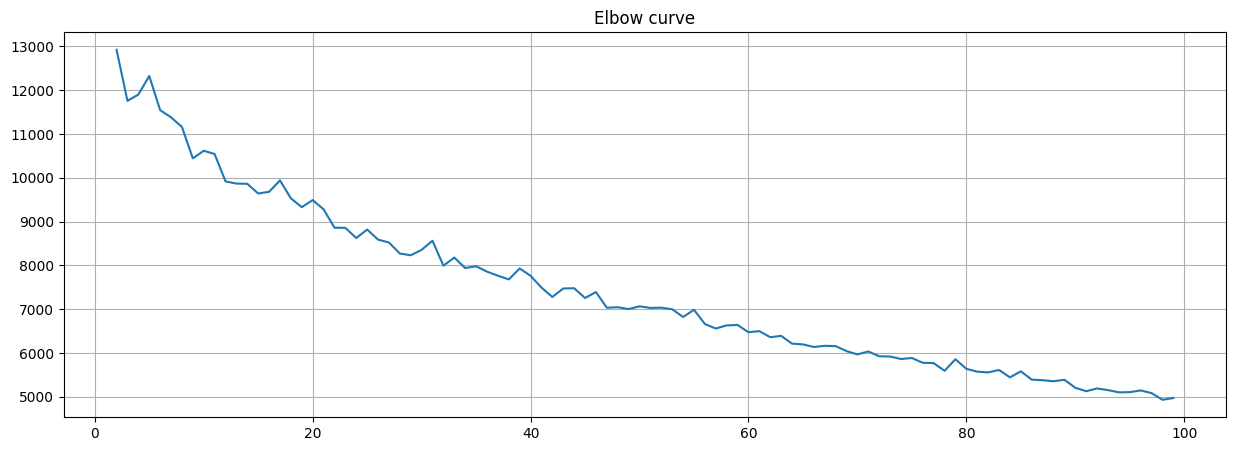

In [21]:
plot_elbow_of_encoding_cluster(labels_multihot, 'multi_hot', k_max=100)

Running kmeans from k = 2 to 100: 100%|██████████| 98/98 [00:54<00:00,  1.81it/s]


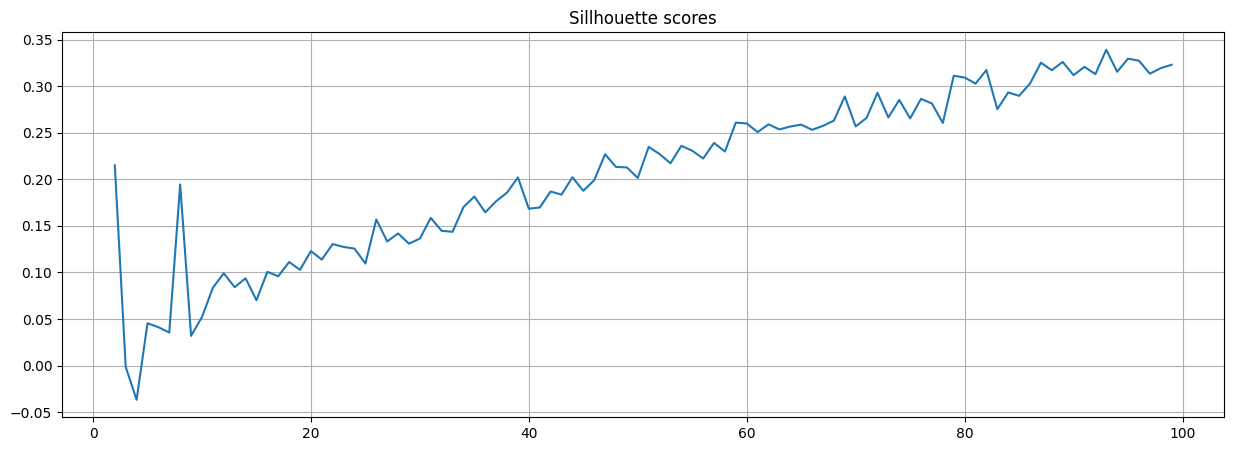

In [37]:
plot_num_clusters_vs_sillhouette(labels_multihot, 'multi_hot', k_max=100)

Running kmeans from k = 2 to 100: 100%|██████████| 98/98 [00:49<00:00,  1.97it/s]


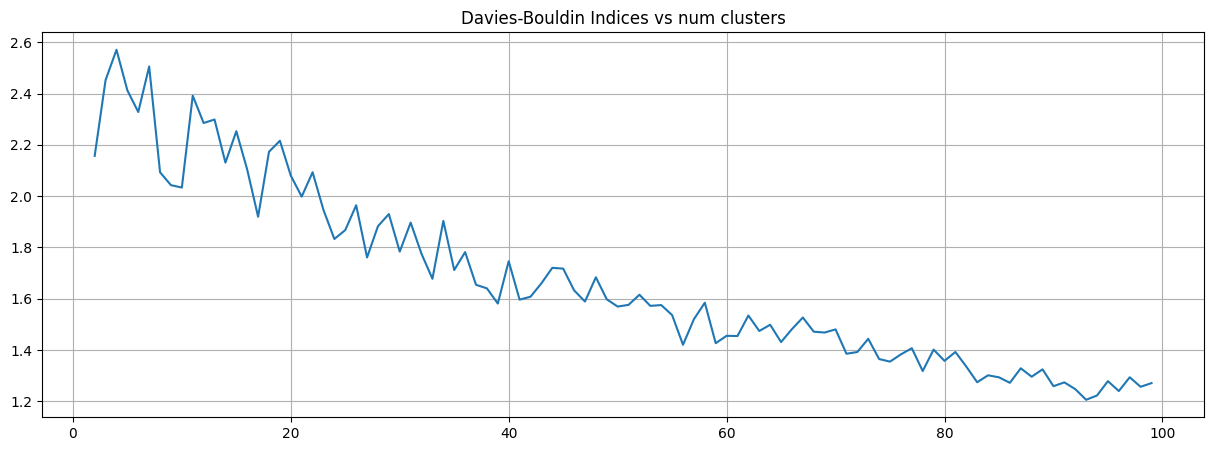

In [40]:
plot_num_clusters_vs_db_score(labels_multihot, 'multi_hot', k_max=100)

From this, we can roughly pick k = 50 as an appropriate number of genre labels.

In [43]:
k = 50
kmeans = cluster_encodings(labels_multihot, 'multi_hot', k)
labels_with_cluster = labels_multihot.copy()
labels_with_cluster['cluster'] = kmeans.labels_
print(f"Sillhouette Score = {get_sillhouette_score(kmeans, labels_multihot, 'multi_hot')}")
print(f"Davies-Bouldin Index = {get_davies_bouldin_index(kmeans, labels_multihot, 'multi_hot')}")
labels_with_cluster.head()

Sillhouette Score = 0.21386977622049447
Davies-Bouldin Index = 1.6643996760112412


,mbtag,multi_hot,cluster
song_id,,,
SOVVDCO12AB0187AF7,"[fusion, jazz fusion, classic pop and rock]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",8
SOKSZVC12A8C142004,[finnish],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1
SOZQSGL12AF72A9145,"[punk, california, san francisco, rock and ind...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",35
SOBHQIJ12A6D4FC7D3,"[old school hip-hop, hip-hop, american, rock a...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",18
SODENZR12AAF3B13B9,[folk],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",40


In [23]:
cluster_counts = list(labels_with_cluster['cluster'].value_counts().index)

In [24]:
i = 0
songs_for_cluster_i = labels_with_cluster[labels_with_cluster['cluster'] == cluster_counts[i]]
print(f"Number of songs in cluster {i}: {songs_for_cluster_i.shape[0]}")
songs_for_cluster_i.head(10)

Number of songs in cluster 0: 748


,mbtag,multi_hot,cluster
song_id,,,
SOSRIVF12AB017DF0E,"[french, composer]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",25
SOVOTBC12A6D4F696A,[latvian],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",25
SOYBJJE12A8C13CC79,[jazz],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",25
SOPAESK12A58A7BA11,"[rock, christian]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",25
SOUGUXL12AB0184B76,[easy listening soundtracks and musicals],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",25
SOABTKM12A8AE4721E,[new metal],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",25
SOELVGK12A8C1337AF,[deutschland],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",25
SOCQEHT12AB017F37F,[filk],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",25
SOACUYZ12CF54662F1,[jazz and blues],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",25


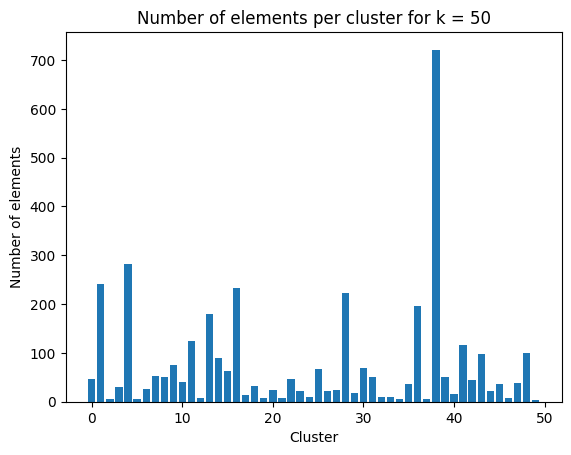

In [25]:
plot_num_elements_per_cluster(labels_multihot, 'multi_hot', k)

We see that around 25% of all songs belong to cluster 10 -- unless this truly represents the dataset, this is not ideal.

### Attempt 2: using Word2Vec to create embeddings instead of multihot encodings

In [26]:
import numpy as np
from util.encoding import w2v_embedding, compute_average_embedding

In [27]:
# Idea: treat each list of genres like a sentence
label_lists = []
for label in tqdm(list(labels_multihot['mbtag']), desc="Constructing label list"):
    label_lists.append(label)

Constructing label list: 100%|██████████| 3710/3710 [00:00<00:00, 732620.90it/s]


In [28]:
label_embeddings = w2v_embedding(
    sentences=label_lists,
    vector_size=100,
    window_size=5,
    min_count=1,
)

Now that we have embeddings for individual genres, we can aggregate them per song. We can use average pooling.

In [29]:
labels_w2v_embedding = tagged_data.copy()[['mbtag']]
labels_w2v_embedding['mbtag_embedding'] = labels_w2v_embedding['mbtag'].apply(lambda x: compute_average_embedding(x, label_embeddings))
labels_w2v_embedding.head()

,mbtag,mbtag_embedding
song_id,,
SOVVDCO12AB0187AF7,"[fusion, jazz fusion, classic pop and rock]","[-0.09526891, 0.09404119, -0.009068976, -0.023..."
SOKSZVC12A8C142004,[finnish],"[-0.14551345, 0.12819046, -0.008779037, -0.014..."
SOZQSGL12AF72A9145,"[punk, california, san francisco, rock and ind...","[-0.120741196, 0.11045152, 0.01509206, -0.0159..."
SOBHQIJ12A6D4FC7D3,"[old school hip-hop, hip-hop, american, rock a...","[-0.1030099, 0.10175818, 0.0061260536, 0.00563..."
SODENZR12AAF3B13B9,[folk],"[-0.1108874, 0.100261375, -0.01191456, -0.0093..."


Next, do kmeans on these average embeddings. First, do elbow curve analysis to determine optimal clustering.

Running kmeans from k = 2 to 100: 100%|██████████| 98/98 [00:08<00:00, 12.23it/s]


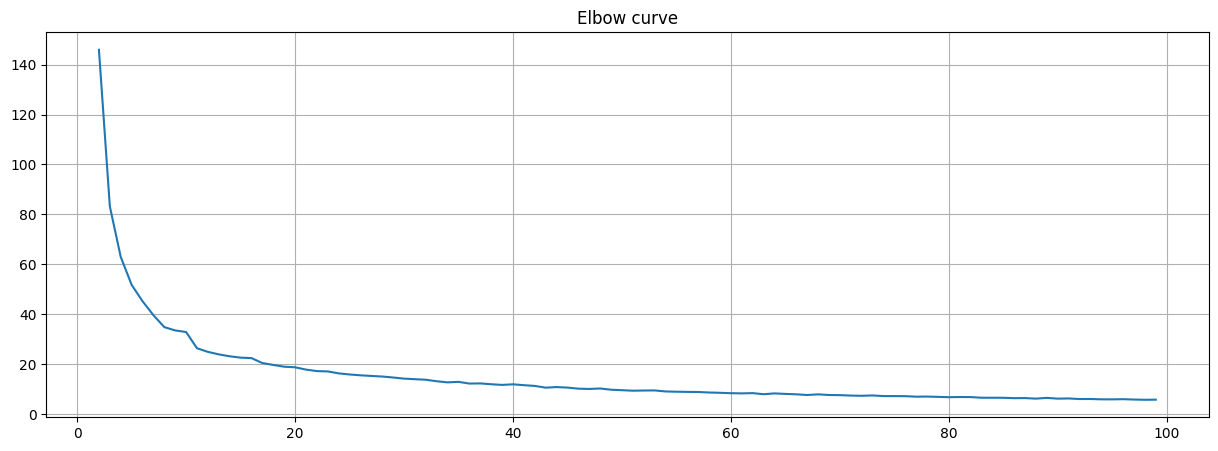

In [30]:
plot_elbow_of_encoding_cluster(labels_w2v_embedding, 'mbtag_embedding', 100)

Running kmeans from k = 2 to 100: 100%|██████████| 98/98 [00:20<00:00,  4.79it/s]


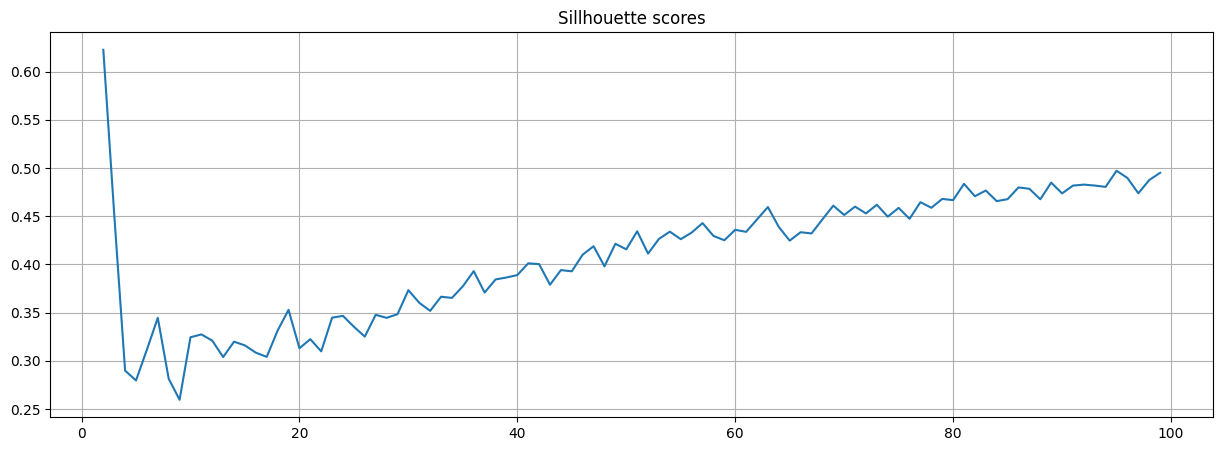

In [38]:
plot_num_clusters_vs_sillhouette(labels_w2v_embedding, 'mbtag_embedding', k_max=100)

Running kmeans from k = 2 to 100: 100%|██████████| 98/98 [00:07<00:00, 12.66it/s]


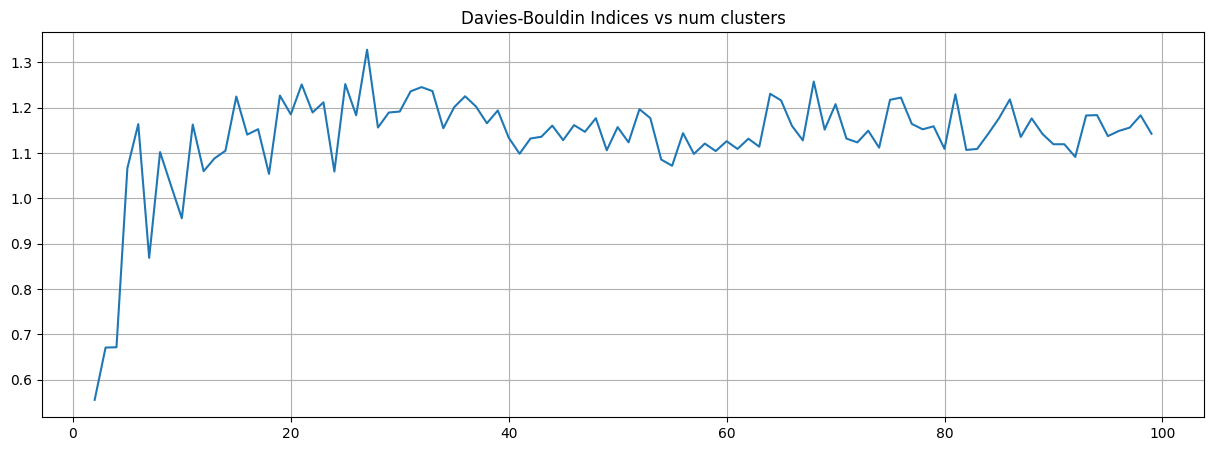

In [45]:
plot_num_clusters_vs_db_score(labels_w2v_embedding, 'mbtag_embedding', k_max=100)

Optimal clustering is around k = 10. Note that with the W2V embedding, we get a steeper drop in the elbow curve.

In [44]:
k2 = 30
kmeans = cluster_encodings(labels_w2v_embedding, 'mbtag_embedding', k2)
labels_w2v_embedding_clustered = labels_w2v_embedding.copy()
labels_w2v_embedding_clustered['cluster'] = kmeans.labels_
print(f"Sillhouette Score = {get_sillhouette_score(kmeans, labels_w2v_embedding, 'mbtag_embedding')}")
print(f"Davies-Bouldin Index = {get_davies_bouldin_index(kmeans, labels_w2v_embedding, 'mbtag_embedding')}")
labels_w2v_embedding_clustered.head()

Sillhouette Score = 0.34406059980392456
Davies-Bouldin Index = 1.2494093768693593


,mbtag,mbtag_embedding,cluster
song_id,,,
SOVVDCO12AB0187AF7,"[fusion, jazz fusion, classic pop and rock]","[-0.09526891, 0.09404119, -0.009068976, -0.023...",3
SOKSZVC12A8C142004,[finnish],"[-0.14551345, 0.12819046, -0.008779037, -0.014...",15
SOZQSGL12AF72A9145,"[punk, california, san francisco, rock and ind...","[-0.120741196, 0.11045152, 0.01509206, -0.0159...",23
SOBHQIJ12A6D4FC7D3,"[old school hip-hop, hip-hop, american, rock a...","[-0.1030099, 0.10175818, 0.0061260536, 0.00563...",8
SODENZR12AAF3B13B9,[folk],"[-0.1108874, 0.100261375, -0.01191456, -0.0093...",24


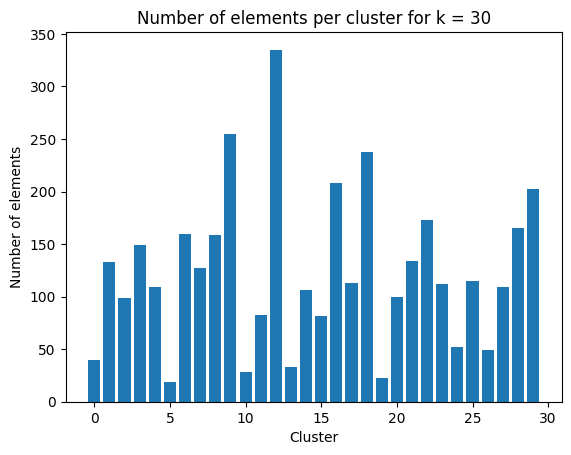

In [32]:
plot_num_elements_per_cluster(labels_w2v_embedding, 'mbtag_embedding', k2)

Note that with w2v embedding, we have a more uniform distribution of element frequency per cluster.

### Save data

In [33]:
def save_data(metadata_df, music_analysis_df, labels_df):
    out_dir = os.path.join(data_dir, 'intermediate_output')
    os.makedirs(out_dir, exist_ok=True)
    metadata_df.to_pickle(os.path.join(out_dir, 'metadata.pkl'))
    music_analysis_df.to_pickle(os.path.join(out_dir, 'music_analysis.pkl'))
    labels_df.to_pickle(os.path.join(out_dir, 'labels.pkl'))

In [ ]:
# save_data(metadata, music_analysis, tagged_data[['mbtag']])